# Neural & Behavioral Modeling - Week 1 (Examples)
by Tsung-Ren (Tren) Huang (tren.huang@gmail.com)

## 為什麼要做模型?
跟實驗一樣，內心中會有一些假設，用模型依照假設，預測結果
<br>比對模型結果和現實世界的現象</br>
<br>刪除假設，或是從模型得到啟發</br>

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from IPython.display import *
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

## 1 Constant Growth & Decay

$dy/dt=c$ where c is a positive constant (growth) or a negative constant (decay)

### 1.1 Symbolic Differentiation & Integration

c
c*t


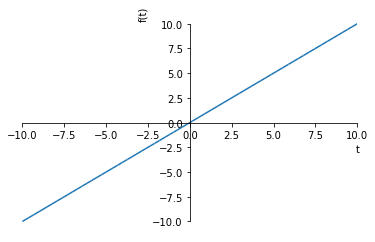

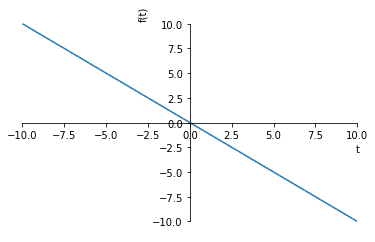

In [2]:
y,t,c=sym.symbols('y,t,c')
y=sym.integrate(c,t)
print(sym.diff(y,t)) # dy/dt=c
print(y) # y=ct
c=1;sym.plot(c*t)
c=-1;sym.plot(c*t);

### 1.2 Numerical Differentiation & Integration
Differentiation: $dy/dt \approx \frac{\Delta y}{\Delta t}=\frac{y(t2)-y(t1)}{t2-t1}$

Euler Integration: $dy/dt=f(t) \implies \frac{y(t2)-y(t1)}{\Delta t}=f(t) \implies y(t2)=y(t1)+\Delta t*f(t)$

In the case of constant growth/decay, f(t)=c. In other words, $dy/dt=f(t)=c$


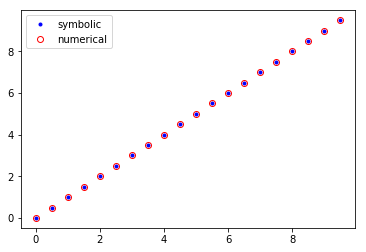

In [3]:
dt=.5 # usually set to .1 or even less 
y=[0]
t=np.arange(0,10,dt)
for i in t:
    y1=y[-1] # the last element
    y2=y1+dt*(1) # Euler integration
    y.append(y2)
plt.plot(t,t,'b.'); # true answer
plt.plot(t,y[0:-1],'ro',markerfacecolor='None') # approximation
plt.legend(['symbolic','numerical']);

## 2 Exponential Growth & Decay

$dy/dt=c*y$ where c is a positive constant (growth) or a negative constant (decay)

### 2.1 Symbolic Differentiation & Integration

In [7]:
c,t = sym.symbols('c,t')
y = sym.Function('y')(t)
sol = sym.dsolve(y.diff()-c*y) # solving dy/dt-c*y=0
print(sol)
y=sym.exp(c*t)
sym.diff(sym.exp(c*t),t) # dy/dt is indeed c*exp(c*t)=c*y(t)

Eq(y(t), C1*exp(c*t))


c*exp(c*t)

### 2.1 Numerical Integration

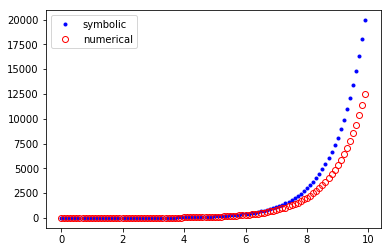

In [8]:
dt=.1 # try 0.01
y=[1] # exp(0)=1
t=np.arange(0,10,dt)
for i in t:
    y1=y[-1] # the last element
    y2=y1+dt*(y1) # Euler integration
    y.append(y2)
plt.plot(t,np.exp(t),'b.'); # true answer
plt.plot(t,y[0:-1],'ro',markerfacecolor='None') # approximation
plt.legend(['symbolic','numerical']);

## 3 Bounded Growth/Excitation & Decay/Inhibition
First observe that the system reach an equilibrium @ dy/dt=0

In the case of constant growth & decay, dy/dt=c and unless c=0, otherwise the system keeps growing or decaying.

In the case of exponential growth & decay, dy/dt=c*y, the system stops changing when either c=0 or y=0 

For a system $dy/dt=E-I$ where E=excitation & I=inhibition, the trick of having a growth uppper bound (U) and a decay lower bound (L) is to rewrite the governing equation into $dy/dt=(U-y)*E-(y-L)*I$ such that the excitation term (U-y)*E becomes 0 once y grows up to U, and the inhibtion term becomes 0 once y decays down to L.

### 3.1 Bounded exponential growth
If we set U=1 for the exponential growth model, the equation becomes $dy/dt=c*(1-y)*y$, which is the so-called "logistic growth".

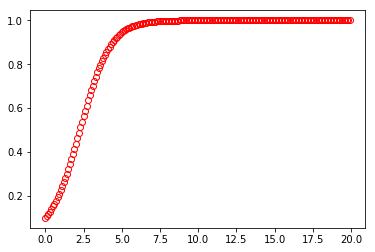

In [9]:
dt=.1
y=[0.1]
t=np.arange(0,20,dt)
for i in t:
    y1=y[-1] # the last element
    y2=y1+dt*(1-y1)*y1 # Euler integration
    y.append(y2)
plt.plot(t,y[0:-1],'ro',markerfacecolor='None'); # approximation

Does the curve looks familiar? It is the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) in logistic regressions as well as the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) in neural networks: $y(t)=\frac{1}{1+exp(-t)}$

Let's check this fact by symbolically solving the differential equation of $dy/dt=c*(1-y)*y$:

In [10]:
c,t = sym.symbols('c,t')
y = sym.Function('y')(t)
sym.dsolve(y.diff()-c*(1-y)*y) # solving dy/dt-c*(1-y)*y=0

Eq(y(t), 1/(C1*exp(-c*t) + 1))

Note that y(t)=1/(1+exp(-ct) can be regarded as a WHAT model of the bounded exponential growth, whereas $dy/dt=c*(1-y)*y$ can be regarded as a HOW/WHY model of the bounded exponential growth.

There are two ways/interpretations for understanding the HOW model:

(1) (1-y) is the coefficient of y: the growth rate (1-y) becomes smaller when the population y gets larger

(2) $y-y^2$ are two forces: the growth factor y dominates when y is small; the decay factor $-y^2$ dominates when y is large

### 3.2 Bounded decay
If we set L=0 for the decay term, the equation becomes $dy/dt=-(y-0)*Inb=-y*Inb$, which Inb is the inhibtion force.

Note that often I can be further broken into self-decay A and decay induced by other forces I, namely Inb=(A+I).

In the end, the equation becomes: $dy/dt=-y*Inb=-y*(A+I)=-Ay-yI$.

### 3.3 The most common form for modeling a dynamic system:

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

where the three terms of the right-hand side are self-decay, excitations, & inhibtions, respectively.

This equation is also called as the [shunting equation](http://cns-alumni.bu.edu/~slehar/webstuff/pcave/shunt.html) in the neural network literature.